In [2]:
import os
import json
import rasterio
import rasterio.features
import shapely.geometry
import pandas as pd
from affine import Affine
import numpy as np
from matplotlib import pyplot as plt
import csv
import rasterio.mask

from rasterio.coords import BoundingBox
from rasterio import windows
from rasterio import warp
from rasterio import mask

import rasterio.plot as plot
from matplotlib.patches import Rectangle


In [12]:
#raster function for india to get total luminosity of India
def raster_array_India(image):
    sumi=0
    data=json.load(open("india.json"))
    ind_geom=[data['geometry']]

    with rasterio.open(image) as src:
        out_imageind,out_transform = rasterio.mask.mask(src, ind_geo, all_touched=True, nodata=0.0,crop=True)
        out_meta=src.meta
    raster_array=out_imageind[0]   
    for row in range (len(raster_array)):
         for col in range(len(raster_array[0])):
                if(raster_array[row][col]<0.0):
                    raster_array[row][col]=0.0
                sumi = sumi + raster_array[row][col]
    return sumi


In [18]:
# to get luminosity of India in a month
with open('dataind.csv','w', newline='') as f:
    thewriter=csv.writer(f)
    thewriter.writerow(['201904',raster_array_India('SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif')])

In [39]:
a=[]
data_states=json.load(open("states.json"))
for x in data_states["features"]:
    a.append(x['id'])
#makes list a of staes in json file to match in raster array state function

In [44]:
#raster array function for states, to get luminosity of a state
def raster_array_state(image,state):
    sumi=0
    for x in data_states['features']:
        if (x['id']==state):
            state_geo=[x['geometry']]
    
    with rasterio.open("SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif") as src:
        out_imagest,out_transform = rasterio.mask.mask(src,state_geo , all_touched=True, nodata=0.0,crop=True)
        out_meta=src.meta   
    raster_array=  out_imagest[0]
    for row in range (len(raster_array)):
            for col in range(len(raster_array[0])):
                if(raster_array[row][col]<0.0):
                    raster_array[row][col]=0.0
                sumi = sumi + raster_array[row][col]
    return sumi


In [45]:
#to find luminosity for all states in given image
with open('datastates.csv','w', newline='') as f:
    thewriter=csv.writer(f)
    for i in a:
        thewriter.writerow(['201904',i,raster_array_state('SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif',i)])
        

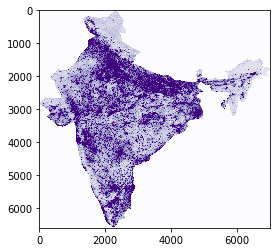

In [34]:
#only to show India
data=json.load(open("india.json"))
geoms=[data['geometry']]

with rasterio.open("SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif") as src:
        out_image,out_transform = rasterio.mask.mask(src, geoms,crop=True)
        out_meta=src.meta
plt.imshow(out_image[0],cmap='Purples',vmin=0,vmax=1)

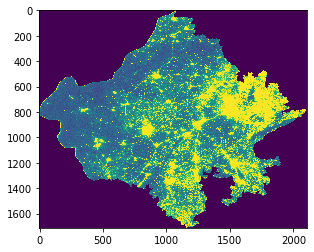

In [33]:
#only to show it's a state
datastates=json.load(open("states.json"))
for x in datastates['features']:
        if (x['id']=='Rajasthan'):
            a=[x['geometry']]
            
with rasterio.open("SVDNB_npp_20190401-20190430_75N060E_vcmcfg_v10_c201905191000.avg_rade9h.tif") as src:
        out_imageraj,out_transform = rasterio.mask.mask(src, a, all_touched=True, nodata=0.0,crop=True)
        out_meta=src.meta
        
plt.imshow(out_imageraj[0],vmin=0,vmax=1)